In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy.linalg as la
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
#Define constants
T=1
M=100
N=1000

#a func, a+ and a-
def simple_a(x, t=0):
    return np.array((x-1/3)*(x-2/3))

def dx_simple_a(x, t=0):
    return np.array(2*x-1)

def simple_a2(x, t=0):
    return np.array((x-1/4)*(x-3/4))

def simple_a3(x, t=0):
    return simple_a(x**2, t)
    #return  #np.array(like_t*(x-1/2)*(x-1/2))

#Matrix creator
def tridiag(lower, diag, upper):
    return np.diag(lower, -1) + np.diag(diag) + np.diag(upper, 1)    

#Plot func
def plot_solutionTest(U1, U2=np.zeros((1,1)), U3=np.zeros((1,1)), angle=-30, filename="pdfName", name="Analytic function"):
    x_len = len(U1[:, ])
    t_len = len(U1[0])
    x=np.linspace(0, 1, x_len) 
    t=np.linspace(0, T, t_len)
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(13, 5), subplot_kw={"projection": "3d"})
    fig.suptitle(name, fontsize=14)
    tt, xx = np.meshgrid(t, x)
    ax[0].plot_surface(tt, xx, U1, cmap=cm.coolwarm)
    ax[0].set_xlabel('t')
    ax[0].set_ylabel('x')
    ax[0].set_zlabel('u')
    ax[0].set_title(r'Numerical solution')
    ax[0].view_init(azim=angle)        # Rotate the figure
    if np.shape(U2)==np.shape(U1):
        ax[1].plot_surface(tt, xx, U2, cmap=cm.coolwarm)
        ax[1].set_xlabel('t')
        ax[1].set_ylabel('x')
        ax[1].set_zlabel('u')
        ax[1].set_title(r'Exact solution')
        ax[1].view_init(azim=angle)
    if np.shape(U3)==np.shape(U1):
        ax[2].plot_surface(tt, xx, U3, cmap=cm.coolwarm)
        ax[2].set_xlabel('t')
        ax[2].set_ylabel('x')
        ax[2].set_zlabel('u')
        ax[2].set_title(r'$u_{analytic} - u_{numerical}$')
        ax[2].view_init(azim=angle)              
    fig.savefig(filename)
    fig.tight_layout()

In [3]:
def LAX_Wendroff(M, T, N, init, bc, a, dx_a, RHS):
    
    h=1/M
    k=T/N
    t=np.linspace(0, T, N+1)
    x=np.linspace(0, 1, M+1)
    
    U=np.zeros((M+1, N+1))
    U[:, 0] = init(x)
    
    r = k/h*(a(x))
    
    lower=1/2*(r**2 + r)[1:] - (k*r*dx_a(x)/4)[1:]
    middle=np.ones(len(x))-r**2
    upper=1/2*(r**2-r)[:-1] + (k*r*dx_a(x)/4)[1:]
    
    A=tridiag(lower, middle, upper)

    for n in range(N):
        U[:, n+1]=A@U[:, n] +k*RHS(t,x,a)[:,n] + k**2/2*(RHS(t,x,a)[:,n]) # Fikse opp i RHS den fyrste skal ikkje vere derivert.  
        U[M, n+1] = 2*U[M-1,n+1] - U[M-2,n+1]
        
        U[0,n+1] = bc(t[n+1], init, a)
    
    return U





In [4]:
T=1
M=100
N=100

xxx=np.linspace(0, 1, M+1)
ttt=np.linspace(0, T, N+1)


def withRHS3(t, x, a):
    tt, xx=np.meshgrid(t, x)
    return 2*np.pi*np.cos(2*np.pi*xx)*np.cos(2*np.pi*tt) - a(xx)*2*np.pi*np.sin(2*np.pi*xx)*np.sin(2*np.pi*tt)

def u_exact3(f, x, a, t):
    #tt, xx=np.meshgrid(t, x)
    return np.cos(2*np.pi*x)*np.sin(2*np.pi*t)

def init_RHS3(x):
    return u_exact3(0, x, 0, 0)

def bc_RHS3(t, init, a):
    return u_exact3(0, 0, 0, t)

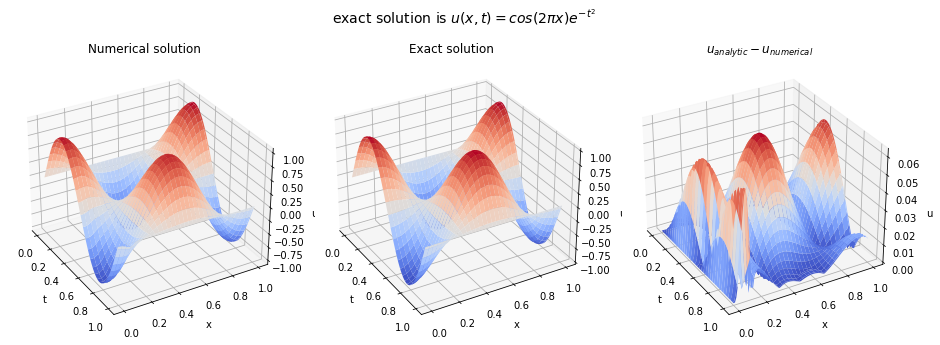

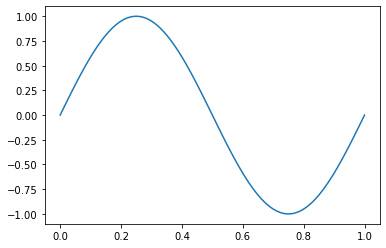

In [6]:
test3= LAX_Wendroff(M, T, N, init_RHS3, bc_RHS3, simple_a, dx_simple_a, withRHS3)

tttt, xxxx=np.meshgrid(ttt, xxx)

exact3 = u_exact3(0,xxxx, simple_a, tttt)

diff3 = np.abs(test3-exact3)

plot_solutionTest(test3, exact3, diff3, angle=-30, filename="numeric upwind vs exact test 1", name=r'exact solution is $u(x,t)=cos(2\pi x)e^{-t^2}$')

plt.figure()
plt.plot(ttt,test3[0,:])
plt.show()



In [ ]:

def bc_test(t, init, a):
    return  init(-a(0)*t) #init_test(-simple_a(0)*t)

def init_noRHS1(x):
    return np.exp(-x)*np.sin(2*np.pi*x)

def exactt(x,t):
    return init_noRHS1(x-simple_a(x)*t)

def exact_sol_1(x,t):
    xx, tt = np.meshgrid(x, t)
    return np.cos(2*np.pi*xx)*np.exp(-tt**2)

def init_test_1(x):
    return np.cos(2*np.pi*x)

def bc_d(t, i, a):
    return np.array(np.exp(-t**2))

def RHS_1(t, x, a):
    tt, xx=np.meshgrid(t, x)
    return -2*tt*np.cos(2*np.pi*xx)*np.exp(-tt**2) - a(xx)*2*np.pi*np.sin(2*np.pi*xx)*np.exp(-tt**2)



#############

def rhs2(t, x, a):
    tt, xx=np.meshgrid(t, x)
    return (1+xx**2-xx+2/9)*np.exp(xx+tt)

def bc_2(t,init,a):
    return (1+2/9)*np.exp(t)

def init_2(x):
    return (1+x**2-x+2/9)*np.exp(x)

################
tttt, xxxx=np.meshgrid(ttt, xxx)

test1= LAX_Wendroff(M, T, N, init_noRHS1, bc_test, simple_a, dx_simple_a, RHS_1)

exact1 = exactt(xxxx,tttt)

diff1 = np.abs(test1-exact1)

plot_solutionTest(test1, exact1, diff1, angle=-30, filename="numeric upwind vs exact test 1", name=r'exact solution is $u(x,t)=cos(2\pi x)e^{-t^2}$')


test2= LAX_Wendroff(M, T, N, init_2, bc_2, simple_a, dx_simple_a, rhs2)

exact2 = exactt(xxxx,tttt)

diff2 = np.abs(test1-exact1)

plot_solutionTest(test2, exact2, diff2, angle=50, filename="numeric upwind vs exact test 1", name=r'exact solution is $u(x,t)=cos(2\pi x)e^{-t^2}$')






In [ ]:
def error_func_h(u_exact_method, scheme, a):
    Ms=np.arange(3,10,1)
    hs=1/Ms
    t=np.linspace(0, T, N+1)
    error = np.zeros(len(hs))
    for i in range(len(Ms)):
        u_numeric, temp1, temp2, temp3 = scheme(Ms[i], T, N, init_test, bc_test, a)
        x = np.linspace(0, 1, Ms[i]+1)
        tt, xx = np.meshgrid(t,x)
        u_exact = u_exact_method(tt, xx)
        error[i] = np.max( np.abs(u_numeric[-1,:] - u_exact[-1,:] ))
    order = np.polyfit(np.log(hs),np.log(error),1)[0]
    return hs, error , order

T=1
M=1000
N=10000


hs, error, order = error_func_h(v_exact_func,LAX_Wendroff, simple_a)

In [ ]:
print(order)

plt.figure(figsize=(8,6))
plt.title(r'Loglog plots of error and reference for order $p=2$', fontsize=20)
plt.loglog(hs, error,'o-', linestyle='-', color="lime", label="LAX-Wendroff")
plt.loglog(hs, 25*hs**2, label=r'$Ch^2$')
plt.legend(fontsize=15)
plt.show()





